# Visualize frequency vs. diffusion with examples
In which we visualize user, subreddit and thread diffusion using example words.

In [5]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import sys
if('..' not in sys.path):
    sys.path.append('..')
from data_processing.data_handler import smooth_stats
import seaborn as sns

## Load data

In [2]:
tf = pd.read_csv('../../data/frequency/2013_2016_tf.tsv', sep='\t', index_col=0)
D_U = pd.read_csv('../../data/frequency/2013_2016_user_diffusion.tsv', sep='\t', index_col=0)
D_S = pd.read_csv('../../data/frequency/2013_2016_subreddit_diffusion.tsv', sep='\t', index_col=0)
D_T = pd.read_csv('../../data/frequency/2013_2016_thread_diffusion.tsv', sep='\t', index_col=0)
vocab = list(tf.index & D_U.index)
tf = tf.loc[vocab]
D_U = D_U.loc[vocab]
D_S = D_S.loc[vocab]
D_T = D_T.loc[vocab]

In [3]:
tf_smooth = pd.np.log10(smooth_stats(tf))

In [4]:
# combine data
tf_smooth['word'] = tf.index
D_U['word'] = D_U.index
D_S['word'] = D_S.index
D_T['word'] = D_T.index
tf_flat = pd.melt(tf_smooth, var_name='date', value_name='f', id_vars=['word'])
D_U_flat = pd.melt(D_U, var_name='date', value_name='D_U', id_vars=['word'])
D_S_flat = pd.melt(D_S, var_name='date', value_name='D_S', id_vars=['word'])
D_T_flat = pd.melt(D_T, var_name='date', value_name='D_T', id_vars=['word'])
combined_df = pd.merge(tf_flat, D_U_flat, on=['word', 'date'], how='inner')
combined_df = pd.merge(combined_df, D_S_flat, on=['word', 'date'], how='inner')
combined_df = pd.merge(combined_df, D_T_flat, on=['word', 'date'], how='inner')
combined_df.fillna(0, inplace=True)
print(combined_df.head())

    word     date         f       D_U       D_S       D_T
0      a  2013-06  7.354435  0.984976  0.968001  0.973331
1     aa  2013-06  4.168497  0.583845  0.425964  0.493712
2    aaa  2013-06  3.961326  0.706101  0.419876  0.557171
3   aaaa  2013-06  2.021189  0.879612  0.684403  0.953437
4  aaaah  2013-06  2.745855  0.931219  0.972055  0.982774


## Sanity check: dissemination vs. frequency correlation

Is there any correlation?

In [ ]:
D_names = ['D_U', 'D_S', 'D_T']
cols = 3
rows = len(D_names) / cols
size = 4
plt.figure(figsize=(cols * size, rows * size))
ctr = 1
for D_name in D_names:
    plt.subplot(rows, cols, ctr)
    sns.regplot(combined_df['f'], combined_df[D_name])
    plt.xlabel('$log(f)$', fontsize=14)
    plt.ylabel('$%s$'%(D_name), fontsize=14)
    ctr += 1
plt.tight_layout()
plt.show()

## Visualize

[(0.0, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1.0), (1.0, 1.25), (1.25, 1.5), (1.5, 1.75), (1.75, 2.0), (2.0, 2.25), (2.25, 2.5), (2.5, 2.75), (2.75, 3.0), (3.0, 3.25), (3.25, 3.5), (3.5, 3.75), (3.75, 4.0), (4.0, 4.25), (4.25, 4.5), (4.5, 4.75), (4.75, 5.0), (5.0, 5.25), (5.25, 5.5), (5.5, 5.75), (5.75, 6.0), (6.0, 6.25), (6.25, 6.5), (6.5, 6.75), (6.75, 7.0), (7.0, 7.25), (7.25, 7.5), (7.5, 7.75), (7.75, 8.0), (8.0, 8.25)]
user diffusion
[0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75]
sub diffusion
[0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75]
thread diffusion
[0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75]


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


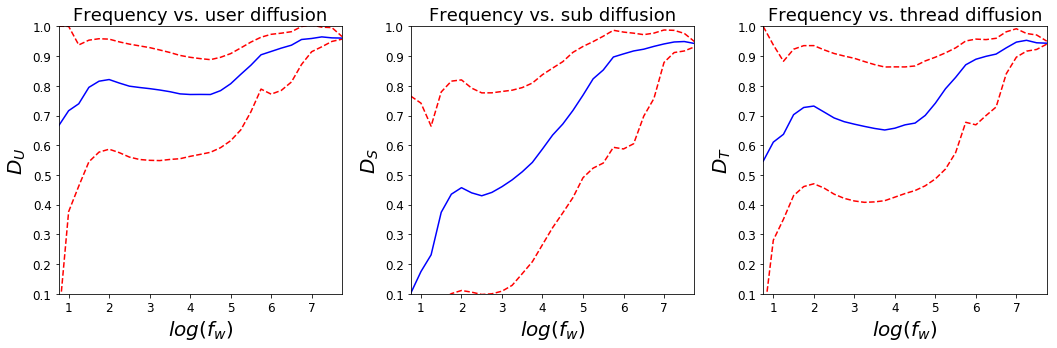

In [44]:
# reproduce percentile graphs?
from math import floor, ceil
lower = floor(combined_df['f'].min())
upper = ceil(combined_df['f'].max())
int_width = 0.25
int_count = 1 / int_width
num = (upper - lower) * int_count + 1
tf_bins = pd.np.linspace(lower, upper, num=num)
tf_bins = zip(tf_bins, tf_bins + int_width)
print(tf_bins)
plt.rcParams.update({'font.size' : 12})
plt.rcParams.update({'axes.titlesize' : 18})
plt.rcParams.update({'axes.labelsize' : 20})
name_values = [('user diffusion', 'D_U', combined_df[['word', 'D_U']]), 
               ('sub diffusion', 'D_S', combined_df[['word', 'D_S']]), 
               ('thread diffusion', 'D_T', combined_df[['word', 'D_T']])
               ]
size = 5
rows = 1
cols = len(name_values)
plt.figure(figsize=(cols*size, rows*size))
lowers = zip(*tf_bins)[0]
y_lower = 0.1
y_upper = 1.0
lower_percentile = 10
upper_percentile = 90
for i, (name, var, D) in enumerate(name_values):
    print(name)
    # restrict diffusion vals to only those with 
#     unique_counts = pd.read_csv()
    plt.subplot(rows, cols, i+1)
    x_vals = []
    lower_percentile_vals = []
    upper_percentile_vals = []
    median_vals = []
    for lower, upper in tf_bins:
#         print('%.3f < x < %.3f'%(lower, upper))
        relevant_words = combined_df[(combined_df['f'] >= lower) & 
                                     (combined_df['f'] < upper)]['word'].tolist()
        if(len(relevant_words) > 0):
            relevant_diffusion = D[D['word'].isin(relevant_words)].sort_values(var, inplace=False, ascending=True)[var]
            # get lower percentile
            lower_percentile_val = pd.np.percentile(relevant_diffusion, lower_percentile)
            lower_percentile_vals.append(lower_percentile_val)
            # get upper percentile
            upper_percentile_val = pd.np.percentile(relevant_diffusion, upper_percentile)
            upper_percentile_vals.append(upper_percentile_val)
            # get median
            median = pd.np.median(relevant_diffusion)
            median_vals.append(median)
#             print('median %.3f'%(median))
            # get lower bound as x value
            x_vals.append(lower)
    # plot percentiles first
    plt.plot(x_vals, lower_percentile_vals, 'r--')
    plt.plot(x_vals, upper_percentile_vals, 'r--')
    # plot medians differently
    plt.plot(x_vals, median_vals, 'b-')
    plt.title('Frequency vs. %s'%(name))
    plt.xlabel('$log(f_w)$')
    plt.ylabel('$%s$'%(var))
    print(x_vals)
    x_lower = min(x_vals)
    x_upper = max(x_vals)
    plt.xlim(x_lower, x_upper)
    plt.ylim(y_lower, y_upper)
plt.tight_layout()
plt.show()

Annotate with a few examples!

In [48]:
test_words = ['cuck', 'af', 'gonna', 'shitposter', 'doggo', 'doxing', 'ikr', 'tbh', 'hyped', 
              'yikes', 'prefab', 'someshit', 'aka']
test_date = '2016-05'
print(combined_df[(combined_df['word'].isin(test_words)) & (combined_df['date'] == test_date)])

               word     date         f       D_U       D_S       D_T
3505495          af  2016-05  4.618027  0.783854  0.735919  0.838136
3506079         aka  2016-05  4.689486  0.835236  0.895776  0.905534
3523775        cuck  2016-05  4.545999  0.279820  0.216412  0.298157
3528461       doggo  2016-05  3.297323  0.827208  0.309071  0.555553
3529046      doxing  2016-05  4.184493  0.052350  0.398325  0.579130
3540225       gonna  2016-05  5.668474  0.792593  0.859991  0.872076
3545747       hyped  2016-05  4.488410  0.887378  0.590458  0.745842
3546339         ikr  2016-05  3.816904  0.832106  0.752854  0.979340
3572282      prefab  2016-05  2.784617  0.751823  0.533683  0.718049
3583414  shitposter  2016-05  3.199206  0.865269  0.591519  0.884158
3586142    someshit  2016-05  2.414973  0.887477  0.740228  0.977736
3591523         tbh  2016-05  5.028295  0.736591  0.801479  0.947117
3603454       yikes  2016-05  4.097674  0.765369  0.858221  0.828267


In [158]:
from math import floor, ceil
def get_binned_stats(x_stat, y_stat, x_bin_width = 0.25, lower_percentile=10, upper_percentile=90):
    """
    Compute lower percentile, median and upper percentile for all y_stat values
    within each specified x_stat bin.
    
    Parameters:
    -----------
    x_stat : pandas.Series
    y_stat : pandas.Series
    x_bin_width : float
    lower_percentile : int
    upper_percentile : int
    
    Returns:
    --------
    x_vals : pandas.Series
    y_vals : pandas.DataFrame
    lower_percentile_vals : pandas.Series
    median_vals : pandas.Series
    upper_percentile_vals : pandas.Series
    """
    lower = floor(x_stat.min())
    upper = ceil(x_stat.max())
    x_bin_width = 0.25
    x_count = 1 / x_bin_width
    num = (upper - lower) * x_count + 1
    x_bins = pd.np.linspace(lower, upper, num=num)
    x_bins = zip(x_bins, x_bins + x_bin_width)
    lowers = zip(*x_bins)[0]
    x_vals = []
    lower_percentile_vals = []
    upper_percentile_vals = []
    median_vals = []
    for lower, upper in x_bins:
        relevant_idx = x_stat[(x_stat >= lower) & (x_stat < upper)].index
        if(len(relevant_idx) > 0):
            y_stat_relevant = y_stat.loc[relevant_idx]
            # get lower percentile
            lower_percentile_val = pd.np.percentile(y_stat_relevant, lower_percentile)
            lower_percentile_vals.append(lower_percentile_val)
            # get upper percentile
            upper_percentile_val = pd.np.percentile(y_stat_relevant, upper_percentile)
            upper_percentile_vals.append(upper_percentile_val)
            # get median
            median = pd.np.median(y_stat_relevant)
            median_vals.append(median)
            # get lower bound as x value
            x_vals.append(lower)
    x_vals = pd.Series(x_vals)
    lower_percentile_vals = pd.Series(lower_percentile_vals)
    median_vals = pd.Series(median_vals)
    upper_percentile_vals = pd.Series(upper_percentile_vals)
    return x_vals, lower_percentile_vals, median_vals, upper_percentile_vals

In [75]:
y_stat_vars = ['D_U', 'D_S', 'D_T']
x_stat = combined_df['f']
x_bin_width = 0.25
lower_percentile = 10
upper_percentile = 90
stat_vals = {}
for y_stat_var in y_stat_vars:
    y_stat = combined_df[y_stat_var]
    x_vals, lower_percentile_vals, median_vals, upper_percentile_vals = get_binned_stats(x_stat, y_stat, 
                                                                                         x_bin_width=x_bin_width, 
                                                                                         lower_percentile=lower_percentile,
                                                                                         upper_percentile=upper_percentile)
    stat_vals[y_stat_var] = (x_vals, lower_percentile_vals, median_vals, upper_percentile_vals)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


user dissemination
subreddit dissemination
thread dissemination


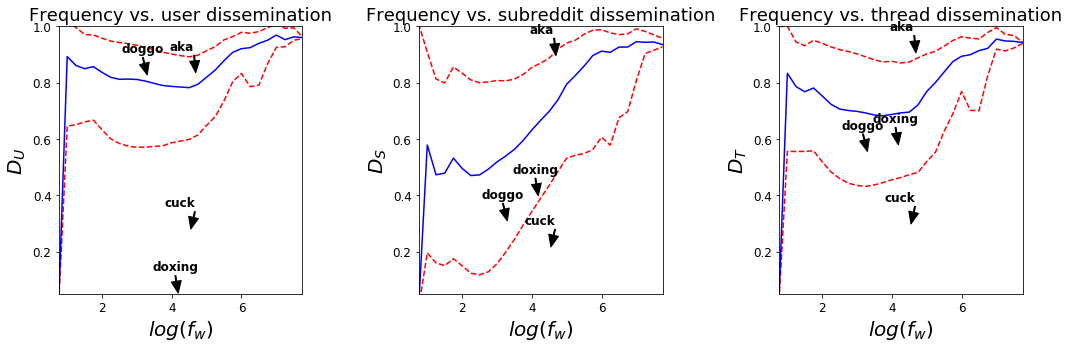

In [77]:
y_stat_vars = ['D_U', 'D_S', 'D_T']
y_stat_names = ['user dissemination', 'subreddit dissemination', 'thread dissemination']
annotate_words = ['aka', 'doxing', 'doggo', 'cuck']
annotate_date = '2016-05'
size = 5
rows = 1
cols = len(y_stat_names)
y_lower = 0.05
y_upper = 1.0
txt_offset_x = -0.75
txt_offset_y = 0.08
plt.figure(figsize=(cols*size, rows*size))
for i, (var, name) in enumerate(zip(y_stat_vars, y_stat_names)):
    print(name)
    plt.subplot(rows, cols, i+1)
    # plot percentiles first
    x_vals, lower_percentile_vals, median_vals, upper_percentile_vals = stat_vals[var]
    plt.plot(x_vals, lower_percentile_vals, 'r--')
    plt.plot(x_vals, upper_percentile_vals, 'r--')
    # plot medians differently
    plt.plot(x_vals, median_vals, 'b-')
    plt.title('Frequency vs. %s'%(name))
    plt.xlabel('$log(f_w)$')
    plt.ylabel('$%s$'%(var))
    x_lower = min(x_vals)
    x_upper = max(x_vals)
    plt.xlim(x_lower, x_upper)
    plt.ylim(y_lower, y_upper)
    # annotate
    for w in annotate_words:
        combined_relevant = combined_df[(combined_df['word'] == w) & (combined_df['date'] == annotate_date)]
        xy = (combined_relevant['f'], combined_relevant[var])
        xy_txt = (xy[0] + txt_offset_x, xy[1] + txt_offset_y)
        plt.annotate(w, xy=xy, xycoords='data', xytext=xy_txt, textcoords='data', weight='bold', color='k',
                     arrowprops=dict(facecolor='black', width=1., headwidth=10.))
plt.tight_layout()
plt.show()

## Temporal viz
What if we break it down by timestamp? E.g. plotting progression of `cuck` over time.

In [82]:
def plot_percentiles_median(x_vals, lower_percentile_vals, median_vals, upper_percentile_vals, 
                            x_var, y_var, x_name, y_name, y_lower, y_upper):
    plt.plot(x_vals, lower_percentile_vals, 'r--')
    plt.plot(x_vals, upper_percentile_vals, 'r--')
    plt.plot(x_vals, median_vals, 'b-')
    plt.title('%s vs. %s'%(x_name, y_name))
    plt.xlabel('$%s$'%(x_var))
    plt.ylabel('$%s$'%(y_var))
    x_lower = min(x_vals)
    x_upper = max(x_vals)
    plt.xlim(x_lower, x_upper)
    plt.ylim(y_lower, y_upper)

user dissemination
subreddit dissemination
thread dissemination


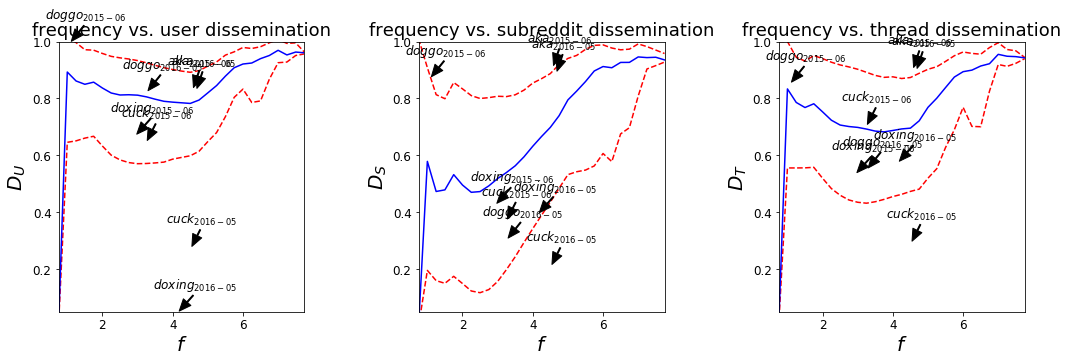

In [89]:
y_stat_vars = ['D_U', 'D_S', 'D_T']
y_stat_names = ['user dissemination', 'subreddit dissemination', 'thread dissemination']
txt_offset_x = -0.75
txt_offset_y = 0.08
plt.figure(figsize=(cols*size, rows*size))
# annotate_dates = ['2013-06', '2014-06', '2015-06', '2016-05']
annotate_dates = ['2015-06', '2016-05']
annotate_words = ['aka', 'doxing', 'doggo', 'cuck']
x_var = 'f'
x_name = 'frequency'
for i, (y_var, y_name) in enumerate(zip(y_stat_vars, y_stat_names)):
    print(y_name)
    plt.subplot(rows, cols, i+1)
    # plot percentiles first
    x_vals, lower_percentile_vals, median_vals, upper_percentile_vals = stat_vals[y_var]
    plot_percentiles_median(x_vals, lower_percentile_vals, median_vals, upper_percentile_vals, 
                        x_var, y_var, x_name, y_name, y_lower, y_upper)
#     plt.plot(x_vals, lower_percentile_vals, 'r--')
#     plt.plot(x_vals, upper_percentile_vals, 'r--')
#     # plot medians differently
#     plt.plot(x_vals, median_vals, 'b-')
#     plt.title('Frequency vs. %s'%(name))
#     plt.xlabel('$log(f_w)$')
#     plt.ylabel('$%s$'%(var))
#     x_lower = min(x_vals)
#     x_upper = max(x_vals)
#     plt.xlim(x_lower, x_upper)
#     plt.ylim(y_lower, y_upper)
    # annotate
    for w in annotate_words:
        for annotate_date in annotate_dates:
            combined_relevant = combined_df[(combined_df['word'] == w) & (combined_df['date'] == annotate_date)]
            xy = (combined_relevant[x_var], combined_relevant[y_var])
            xy_txt = (xy[0] + txt_offset_x, xy[1] + txt_offset_y)
            annotate_txt = r'$%s_{%s}$'%(w, annotate_date)
            plt.annotate(annotate_txt, xy=xy, xycoords='data', xytext=xy_txt, textcoords='data', weight='bold', color='k',
                         arrowprops=dict(facecolor='black', width=1., headwidth=10.))
plt.tight_layout()
plt.show()

Too cluttered! Although if we found better pairs maybe this wouldn't be an issue.

## Frequency vs. dissemination correlations
For each growth word $g$, what is the correlation between its frequency and dissemination? Do most growth words tend toward lower dissemination?

In [149]:
growth_words = pd.read_csv('../../data/frequency/word_lists/2013_2016_growth_words_clean.csv', index_col=False)['word']
growth_words = set(growth_words) & set(D_U.index)
print(len(growth_words))

1476


In [150]:
from itertools import izip
from scipy.stats import pearsonr
correls_d = {}
D_list = [D_U, D_S, D_T]
# D_list = [d.drop('word', axis=1, inplace=False) for d in D_list]
D_names = ['D_U', 'D_S', 'D_T']
tf_smooth_vals = tf_smooth.ix[:, D_list[0].columns]
for D, D_name in izip(D_list, D_names):
    correls = []
    for g in growth_words:
        correl, pval = pearsonr(tf_smooth_vals.loc[g], D.loc[g])
        correls.append((correl, pval))
    correls = pd.concat([pd.Series(c) for c in correls], axis=1).transpose()
    correls.index = growth_words
    correls.columns = ['correl', 'pvalue']
    correls_d[D_name] = correls

In [151]:
print(correls_d['D_U'].head())

              correl    pvalue
yikes      -0.432522  0.008424
botting    -0.680925  0.000005
fuckups     0.396974  0.016520
cuckolding -0.654886  0.000015
crits      -0.662312  0.000011


Plot full distribution of correlations.

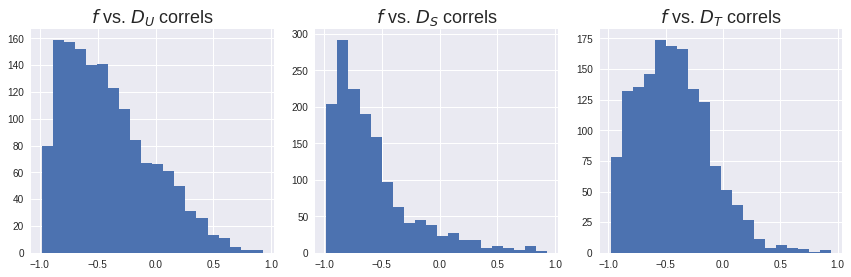

In [152]:
cols = 3
rows = int(ceil(len(D_list) / cols))
size = 4
plt.figure(figsize=(size * cols, size * rows))
bins = 20
ctr = 1
for D_name in D_names:
    plt.subplot(rows, cols, ctr)
    plt.hist(correls_d[D_name]['correl'], bins=bins)
    plt.title('$f$ vs. $%s$ correls'%(D_name), fontsize=18)
    plt.xlabel('')
    ctr += 1
plt.tight_layout()
plt.show()

Interesting! Most growth words Have negative correlation with dissemination, suggesting that most words get popular in a particular niche.

Restrict to significant correlations.

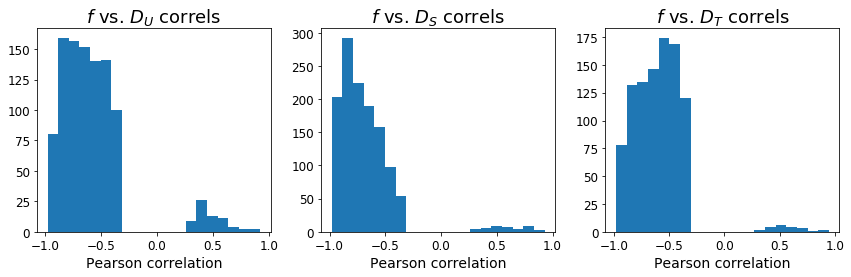

In [135]:
cols = 3
rows = int(ceil(len(D_list) / cols))
size = 4
plt.figure(figsize=(size * cols, size * rows))
bins = 20
ctr = 1
for D_name in D_names:
    plt.subplot(rows, cols, ctr)
    correl_vals = correls_d[D_name]
    correl_vals = correl_vals[correl_vals['pvalue'] < 0.05]['correl']
    plt.hist(correl_vals, bins=bins)
    plt.title('$f$ vs. $%s$ correls'%(D_name), fontsize=18)
    plt.xlabel('Pearson correlation', fontsize=14)
    ctr += 1
plt.tight_layout()
plt.show()

What are the high correlation words?

In [153]:
S = 20
for D_name in D_names:
    print(D_name)
    correl_vals = correls_d[D_name]
    correl_vals = correl_vals[correl_vals['pvalue'] < 0.05]['correl']
    print(correl_vals[correl_vals < 0].sort_values(inplace=False, ascending=True).head(S))
    print(correl_vals[correl_vals > 0].sort_values(inplace=False, ascending=False).head(S))

D_U
perks         -0.980111
har           -0.978588
cig           -0.972663
ab            -0.967895
backline      -0.964380
urs           -0.964164
agg           -0.957071
nuker         -0.956574
premade       -0.954945
perk          -0.953686
fangame       -0.951247
acker         -0.949966
fic           -0.949928
feat          -0.949711
meatshields   -0.948930
toons         -0.948831
feats         -0.948383
audiobook     -0.948235
firmware      -0.947853
timezone      -0.947351
Name: correl, dtype: float64
af              0.925725
bruh            0.886308
pleb            0.737645
obvs            0.735149
rn              0.714019
shittier        0.664234
sub             0.656882
bruv            0.647266
muh             0.634688
humblebrag      0.617106
cherrypicked    0.608121
shitposter      0.606652
wubba           0.594195
judgy           0.594047
townhall        0.568601
tho             0.568363
weaboo          0.555541
culty           0.555340
obvi            0.546718
ded         

The high correlation words look like the most acceptable (e.g. `af`, `flaired`, `ofc`). 

Plot example frequency/dissemination trajectory pairs.

In [158]:
# tf_smooth.drop('word', inplace=True, axis=1)
D_U.drop('word', inplace=True, axis=1)
D_S.drop('word', inplace=True, axis=1)
D_T.drop('word', inplace=True, axis=1)

In [160]:
tf_smooth = tf_smooth.ix[:, D_U.columns]

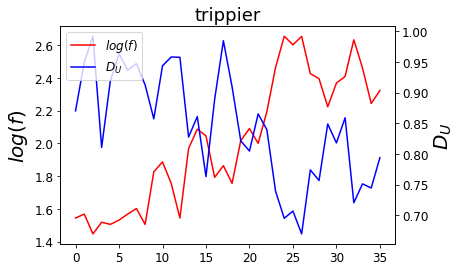

In [173]:
def dual_plot(w, var_1, var_2, var_1_name, var_2_name):
    X = range(var_1.shape[1])
    l1, = plt.plot(X, var_1.loc[w], color='r', label=var_1_name)
    plt.ylabel(var_1_name)
    ax = plt.twinx()
    l2, = ax.plot(X, var_2.loc[w], color='b', label=var_2_name)
    ax.set_ylabel(var_2_name)
    plt.legend([l1, l2], [var_1_name, var_2_name], loc='upper left')
    plt.title(w)
    plt.show()
test_word = 'trippier'
var_1 = tf_smooth
var_2 = D_U
var_1_name = '$log(f)$'
var_2_name = '$D_{U}$'
dual_plot(test_word, var_1, var_2, var_1_name, var_2_name)

In [171]:
tf_norm = pd.read_csv('../../data/frequency/2013_2016_tf_norm.tsv', sep='\t', index_col=0)
tf_norm.fillna(0, inplace=True)
tf_norm = pd.np.log10(smooth_stats(tf_norm))

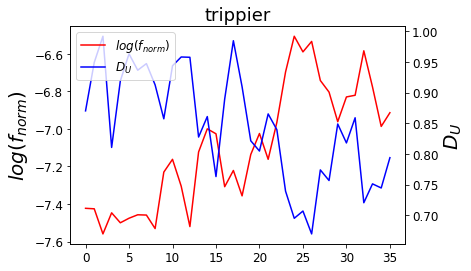

In [174]:
test_word = 'trippier'
var_1 = tf_norm
var_1_name = '$log(f_{norm})$'
var_2 = D_U
var_2_name = '$D_{U}$'
dual_plot(test_word, var_1, var_2, var_1_name, var_2_name)

This actually corroborates Altmann et al.'s (2011) finding that dissemination is negatively correlated with frequency change. More specifically: the expected number of users $\tilde{U}$ increases with increasing frequency, which leads the ratio of $\frac{U}{\tilde{U}}$ to decrease even if $U$ isn't changing.

Is this pattern different from the decline words?

In [143]:
decline_words = pd.read_csv('../../data/frequency/word_lists/2013_2016_decline_words.csv', index_col=False)['word']
decline_words = list(set(decline_words) & set(D_U.index))
print(len(decline_words))

1228


In [144]:
correls_d_decline = {}
D_list = [D_U, D_S, D_T]
D_list = [d.fillna(0, inplace=False) for d in D_list]
D_names = ['D_U', 'D_S', 'D_T']
tf_smooth_vals = tf_smooth.ix[:, D_list[0].columns]
for D, D_name in izip(D_list, D_names):
    correls = []
    for d in decline_words:
        correl, pval = pearsonr(tf_smooth_vals.loc[d], D.loc[d])
        correls.append((correl, pval))
    correls = pd.concat([pd.Series(c) for c in correls], axis=1).transpose()
    correls.index = decline_words
    correls.columns = ['correl', 'pvalue']
    correls_d_decline[D_name] = correls

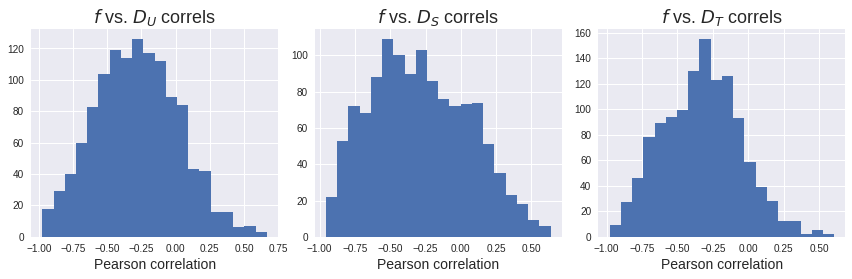

In [145]:
cols = 3
rows = int(ceil(len(D_list) / cols))
size = 4
plt.figure(figsize=(size * cols, size * rows))
bins = 20
ctr = 1
for D_name in D_names:
    plt.subplot(rows, cols, ctr)
    plt.hist(correls_d_decline[D_name]['correl'], bins=bins)
    plt.title('$f$ vs. $%s$ correls'%(D_name), fontsize=18)
    plt.xlabel('Pearson correlation', fontsize=14)
    ctr += 1
plt.tight_layout()
plt.show()

Weird! So decline words tend to become "more" diffuse as they decline.

Investigate the negatively and positively correlated diffusion words.

In [146]:
for D_name in D_names:
    print(D_name)
    print(correls_d_decline[D_name].sort_values('correl', inplace=False, ascending=True).head(20))
    print(correls_d_decline[D_name].sort_values('correl', inplace=False, ascending=False).head(20))

D_U
                correl        pvalue
wat          -0.974582  1.132678e-23
dae          -0.958434  4.280126e-20
carto        -0.957036  7.428875e-20
orly         -0.941940  1.104913e-17
bustin       -0.937436  3.800380e-17
wub          -0.930569  2.115939e-16
fuckle       -0.929442  2.757502e-16
paleo        -0.924856  7.761287e-16
mani         -0.918155  3.146211e-15
ohgod        -0.907949  2.140592e-14
meth         -0.907795  2.199483e-14
horsecock    -0.907350  2.378785e-14
vagoo        -0.906988  2.534559e-14
gayyy        -0.905813  3.108534e-14
fundie       -0.901984  5.937772e-14
subreddit    -0.900926  7.067501e-14
conspiratard -0.900031  8.177607e-14
booobs       -0.899763  8.539946e-14
fucktarded   -0.892494  2.650301e-13
fapping      -0.887346  5.634531e-13
                 correl    pvalue
looove         0.667013  0.000009
fucktards      0.653812  0.000015
butthurt       0.601583  0.000104
dumbass        0.581823  0.000198
cocksuckers    0.575225  0.000243
tfyc           

In [175]:
test_words = ['wat', 'dae', 'orly', 'bustin']
print(D_U.loc[test_words])

         2013-06   2013-07   2013-08   2013-09   2013-10   2013-11   2013-12  \
wat     0.179188  0.343233  0.390322  0.354908  0.305084  0.431992  0.470503   
dae     0.494802  0.617703  0.588596  0.641636  0.638683  0.607562  0.613279   
orly    0.680352  0.685439  0.762340  0.769067  0.822696  0.797965  0.855775   
bustin  0.620514  0.745154  0.642158  0.746568  0.722381  0.782631  0.783066   

         2014-01   2014-02   2014-03    ...      2015-08   2015-09   2015-10  \
wat     0.242972  0.229051  0.236740    ...     0.805231  0.809257  0.794453   
dae     0.669162  0.691196  0.652710    ...     0.691901  0.685679  0.690434   
orly    0.781057  0.815712  0.804185    ...     0.915856  0.913585  0.884174   
bustin  0.758643  0.664812  0.759407    ...     0.717966  0.722355  0.818990   

         2015-11   2015-12   2016-01   2016-02   2016-03   2016-04   2016-05  
wat     0.811661  0.818041  0.718114  0.854696  0.814515  0.816564  0.801085  
dae     0.685937  0.699704  0.720772  0.

The words with a positive correlation must be losing users/subreddits/threads faster than the frequency is dropping, resulting in lower diffusion.

## Sanity check: unique counts
Is word frequency correlated with unique social counts?

In [26]:
U_count = pd.read_csv('../../data/frequency/2013_2016_unique_user_counts.tsv', sep='\t', index_col=0)
S_count = pd.read_csv('../../data/frequency/2013_2016_unique_subreddit_counts.tsv', sep='\t', index_col=0)
T_count = pd.read_csv('../../data/frequency/2013_2016_unique_thread_counts.tsv', sep='\t', index_col=0)

In [29]:
vocab = set(U_count.index) & set(tf_smooth.index)

In [34]:
tf = pd.read_csv('../../data/frequency/2013_2016_tf.tsv', sep='\t', index_col=0)
tf_smooth = pd.np.log10(smooth_stats(tf))

In [35]:
print(tf_smooth.columns)

Index([u'2013-01', u'2013-02', u'2013-03', u'2013-04', u'2013-05', u'2013-06',
       u'2013-07', u'2013-08', u'2013-09', u'2013-10', u'2013-11', u'2013-12',
       u'2014-01', u'2014-02', u'2014-03', u'2014-04', u'2014-05', u'2014-06',
       u'2014-07', u'2014-08', u'2014-09', u'2014-10', u'2014-11', u'2014-12',
       u'2015-01', u'2015-02', u'2015-03', u'2015-04', u'2015-05', u'2015-06',
       u'2015-07', u'2015-08', u'2015-09', u'2015-10', u'2015-11', u'2015-12',
       u'2016-01', u'2016-02', u'2016-03', u'2016-04', u'2016-05'],
      dtype='object')


In [36]:
tf_smooth = tf_smooth.ix[vocab, U_count.columns]
print(tf_smooth.head())

          2013-06   2013-07   2013-08   2013-09   2013-10   2013-11   2013-12  \
fawn     2.939519  2.834421  2.809560  2.725095  2.804139  2.779596  2.773786   
fawk     1.832509  1.792392  1.770852  1.934498  1.959041  1.857332  1.919078   
nunnery  1.857332  1.838849  1.755875  1.672098  1.770852  1.799341  1.755875   
sowell   2.127105  2.424882  2.161368  2.238046  2.440909  2.252853  2.227887   
sonja    2.056905  1.851258  2.053078  1.913814  1.954243  1.934498  1.977724   

          2014-01   2014-02   2014-03    ...      2015-08   2015-09   2015-10  \
fawn     2.793790  2.855519  2.831870    ...     3.014521  2.850033  2.981819   
fawk     1.939519  1.959041  2.004321    ...     2.344392  2.315970  2.313867   
nunnery  1.755875  1.832509  1.716003    ...     1.908485  1.908485  1.799341   
sowell   2.408240  2.267172  2.212188    ...     2.472756  2.498311  2.419956   
sonja    1.986772  1.934498  2.071882    ...     2.675778  2.397940  2.498311   

          2015-11   2015-1

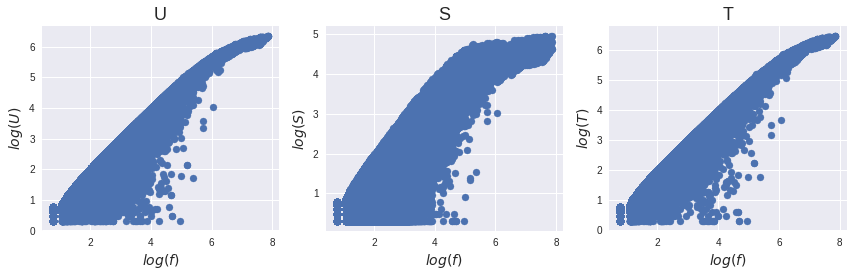

In [40]:
from itertools import izip
social_counts = [U_count, S_count, T_count]
social_counts = [pd.np.log10(smooth_stats(s.loc[vocab])) for s in social_counts]
social_count_names = ['U', 'S', 'T']
cols = 3
rows = 1
size = 4
plt.figure(figsize=(size * cols, size * rows))
ctr = 1
for social_count, social_count_name in izip(social_counts, social_count_names):
    plt.subplot(rows, cols, ctr)
    plt.scatter(tf_smooth.values.flatten(), social_count.values.flatten())
    plt.title(social_count_name, fontsize=18)
    plt.xlabel('$log(f)$', fontsize=14)
    plt.ylabel('$log(%s)$'%(social_count_name), fontsize=14)
    ctr += 1
plt.tight_layout()
plt.show()

Strong positive correlation between frequency and unique social counts, so we can assume that a high frequency word will tend to have a higher unique social count.

What's happening with the low frequency band?

In [47]:
social_var_flat_list = []
for social_count, social_count_name in izip(social_counts, social_count_names):
    social_count['word'] = social_count.index
    social_var_flat = pd.melt(social_count, id_vars=['word'], var_name='date', value_name=social_count_name)
    social_var_flat_list.append(social_var_flat)
combined_tf_social = pd.merge(social_var_flat_list[0], social_var_flat_list[1], how='inner', on=['word', 'date'])
combined_tf_social = pd.merge(combined_tf_social, social_var_flat_list[2], how='inner', on=['word', 'date'])
tf_flat = tf_smooth.copy()
tf_flat['word'] = tf_flat.index
tf_flat = pd.melt(tf_flat, id_vars=['word'], var_name='date', value_name='f')
combined_tf_social = pd.merge(combined_tf_social, tf_flat, how='inner', on=['word', 'date'])
print(combined_tf_social.head())

      word     date         U         S         T         f
0     fawn  2013-06  2.804821  2.348305  2.735599  2.939519
1     fawk  2013-06  1.732394  1.633468  1.763428  1.832509
2  nunnery  2013-06  1.755875  1.518514  1.672098  1.857332
3   sowell  2013-06  1.924279  1.662758  1.892095  2.127105
4    sonja  2013-06  1.869232  1.568202  1.778151  2.056905


In [50]:
for social_count_name in social_count_names:
    print(combined_tf_social[combined_tf_social[social_count_name] > combined_tf_social['f']])

Empty DataFrame
Columns: [word, date, U, S, T, f]
Index: []
Empty DataFrame
Columns: [word, date, U, S, T, f]
Index: []
Empty DataFrame
Columns: [word, date, U, S, T, f]
Index: []


Sanity check complete: there is no case in which the unique social count is greater than the frequency. WE'RE GOOD.

What about the correlation between social count and dissemination?

In [52]:
D_list = [D_U, D_S, D_T]
D_names = ['D_U', 'D_S', 'D_T']
for D, D_name in izip(D_list, D_names):
    D_flat = pd.melt(D, id_vars=['word'], value_name=D_name, var_name='date')
    combined_tf_social = pd.merge(combined_tf_social, D_flat, how='inner', on=['word', 'date'])
print(combined_tf_social.head())

      word     date         U         S         T         f       D_U  \
0     fawn  2013-06  2.804821  2.348305  2.735599  2.939519  0.803662   
1     fawk  2013-06  1.732394  1.633468  1.763428  1.832509  0.913522   
2  nunnery  2013-06  1.755875  1.518514  1.672098  1.857332  0.907663   
3   sowell  2013-06  1.924279  1.662758  1.892095  2.127105  0.699306   
4    sonja  2013-06  1.869232  1.568202  1.778151  2.056905  0.727745   

        D_S       D_T  
0  0.563999  0.636235  
1  0.858947  0.920230  
2  0.620013  0.697676  
3  0.498298  0.602737  
4  0.459088  0.547198  


In [56]:
combined_tf_social.fillna(0, inplace=True)

U ~ D_U = 0.064 (p=0.000E+00)
S ~ D_S = 0.524 (p=0.000E+00)
T ~ D_T = 0.066 (p=0.000E+00)


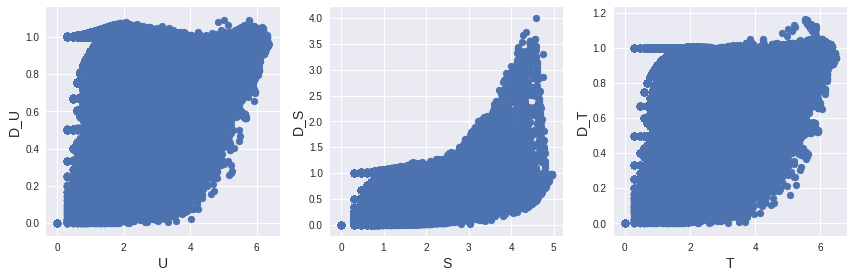

In [57]:
from scipy.stats import pearsonr
cols = 3
rows = 1
size = 4
plt.figure(figsize=(cols * size, rows * size))
ctr = 1
for social_count_name in social_count_names:
    D_name = 'D_%s'%(social_count_name)
    plt.subplot(rows, cols, ctr)
    plt.scatter(combined_tf_social[social_count_name], combined_tf_social[D_name])
    plt.xlabel(social_count_name, fontsize=14)
    plt.ylabel(D_name, fontsize=14)
    ctr += 1
    correl, pval = pearsonr(combined_tf_social[social_count_name], combined_tf_social[D_name])
    print('%s ~ %s = %.3f (p=%.3E)'%(social_count_name, D_name, correl, pval))
plt.tight_layout()
plt.show()

OK, so we know with reasonable confidence that the diffusion metrics aren't just copying the unique counts. The correlation between $S$ and $D_{S}$ probably has to do with the relatively smaller number of subreddits, which means that words with higher unique subreddit counts are much more likely to also have a higher dissemination.

## Compare dissemination and social counts

Plot example growth words with both dissemination $D$ and raw social counts $SC$.

In [86]:
D_S.drop('word', axis=1, inplace=True)
D_T.drop('word', axis=1, inplace=True)

In [105]:
tf_norm = pd.read_csv('../../data/frequency/2013_2016_tf_norm.tsv', sep='\t', index_col=0)
tf_norm_smooth = pd.np.log10(smooth_stats(tf_norm))

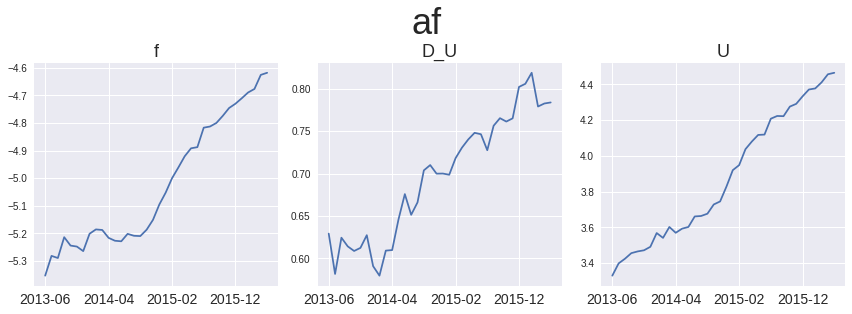

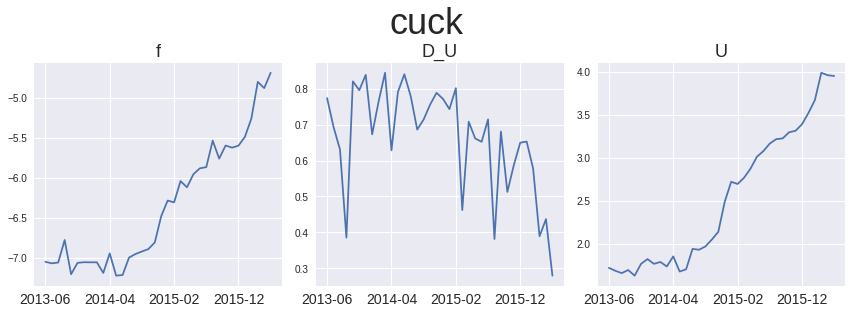

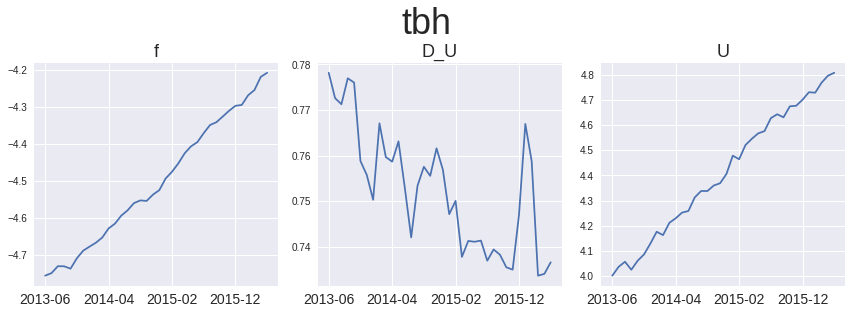

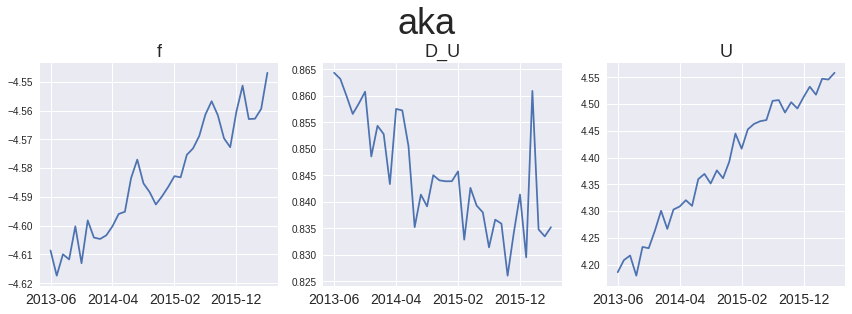

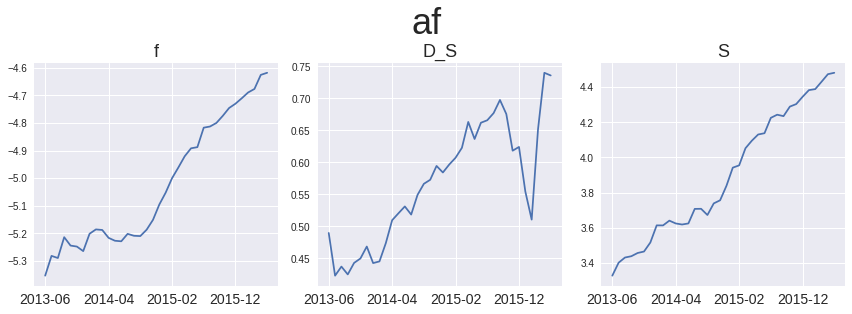

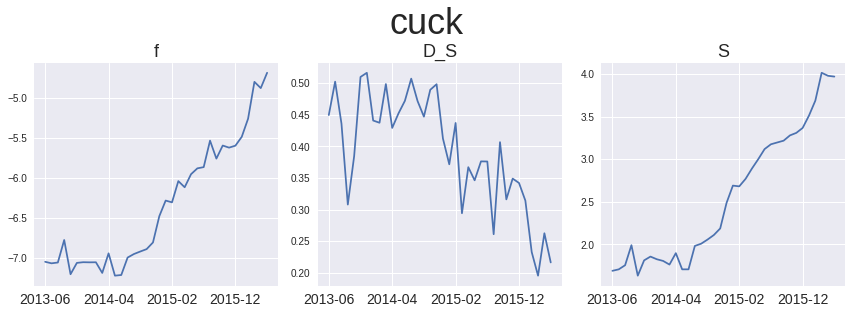

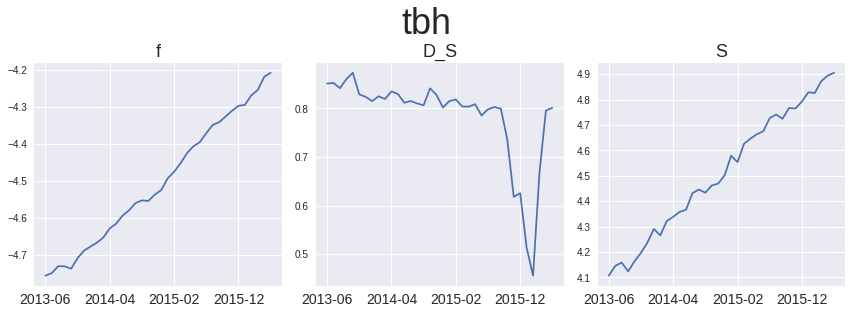

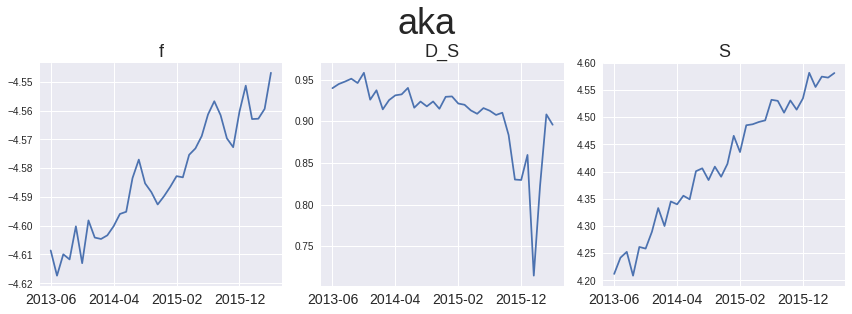

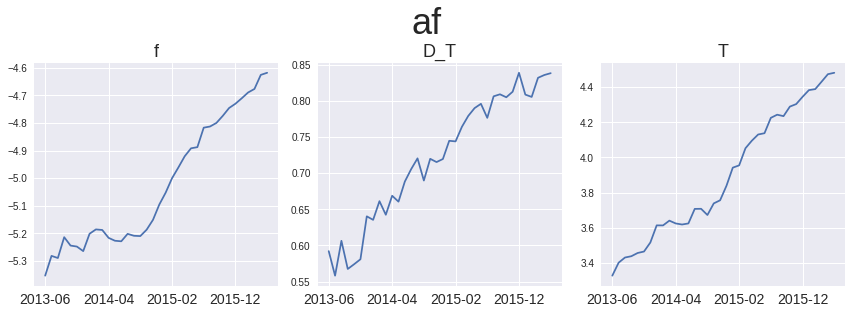

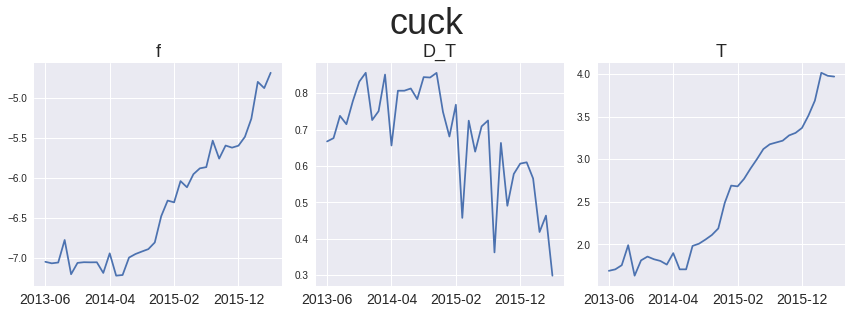

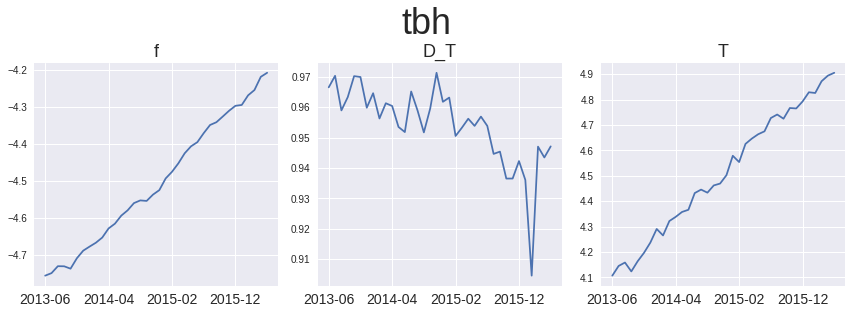

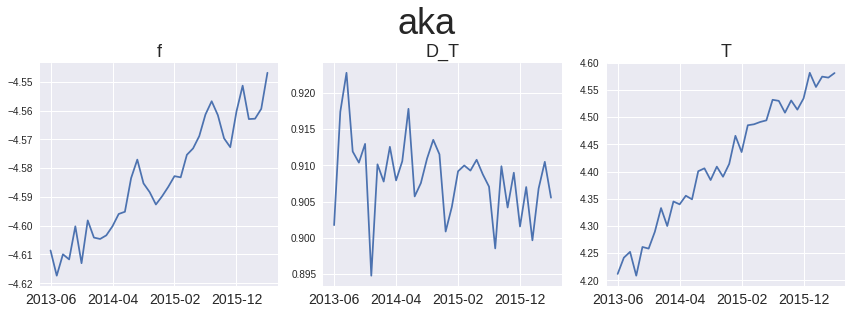

In [106]:
test_words = ['af', 'cuck', 'tbh', 'aka']
N = 3
size = 4
X = range(tf_smooth.shape[1])
xlabels = tf_smooth.columns
xticks, xlabels = zip(*zip(X, xlabels)[::10])
D_list = [D_U, D_S, D_T]
S_list = [U_count, S_count, T_count]
social_var_names = ['U', 'S', 'T']
for D, S_count, social_var_name in izip(D_list, S_list, social_var_names):
    plot_stats = [tf_norm_smooth, D, pd.np.log10(smooth_stats(S_count))]
    plot_stat_names = ['f', 'D_%s'%(social_var_name), social_var_name]
    for w in test_words:
        plt.figure(figsize=(N * size, size))
        for i, (stat, stat_name) in enumerate(izip(plot_stats, plot_stat_names)):
            plt.subplot(1, N, i+1)
            plt.plot(X, stat.loc[w])
            plt.xticks(xticks, xlabels, fontsize=14)
            plt.title(stat_name, fontsize=18)
        plt.tight_layout()
        plt.suptitle(w, y=1.08, fontsize=36)

For all growth words we see that the actual social count $SC$ increases in parallel with $f$, so it must be the case that for words like `af` the actual $SC$ is outpacing the frequency. Maybe these are the most interesting words, since they must be penetrating a larger audience than expected.

## Correlate dissemination with frequency delta
Can we reproduce the finding of Altmann et al. (2011) that social dissemination weakly predicts frequency change?

In [58]:
tf_delta = pd.DataFrame(tf_smooth.ix[:, 1:].values - tf_smooth.ix[:, :-1].values, index=tf_smooth.index, columns=tf_smooth.columns[1:])

In [64]:
tf_delta[tf_smooth.columns[0]] = 0
tf_delta = tf_delta[sorted(tf_delta.columns)]
tf_delta['word'] = tf_delta.index
print(tf_delta.head(1))
tf_delta_flat = pd.melt(tf_delta, id_vars=['word'], var_name='date', value_name='f_delta')
print(tf_delta_flat.head(1))
combined_tf_social = pd.merge(combined_tf_social, tf_delta_flat, how='inner', on=['word', 'date'])

      2013-06   2013-07   2013-08   2013-09   2013-10   2013-11  2013-12  \
fawn        0 -0.105099 -0.024861 -0.084465  0.079045 -0.024543 -0.00581   

       2014-01   2014-02   2014-03  ...    2015-09   2015-10   2015-11  \
fawn  0.020004  0.061729 -0.023649  ...  -0.164487  0.131785 -0.014739   

       2015-12   2016-01   2016-02   2016-03   2016-04   2016-05  word  
fawn -0.052208  0.003159  0.037176  0.046527 -0.026762 -0.023149  fawn  

[1 rows x 37 columns]
   word     date  f_delta
0  fawn  2013-06      0.0


In [65]:
print(combined_tf_social.head(1))

   word     date         U         S         T         f       D_U       D_S  \
0  fawn  2013-06  2.804821  2.348305  2.735599  2.939519  0.803662  0.563999   

        D_T  f_delta  
0  0.636235      0.0  


In [67]:
date_initial = combined_tf_social['date'].min()
print(date_initial)
date_final = combined_tf_social['date'].max()
print(date_final)

2013-06
2016-05


In [69]:
combined_tf_social.sort_values(['date', 'word'], inplace=True)
combined_tf_social_initial = combined_tf_social[combined_tf_social['date'] != date_final]
combined_tf_social_final = combined_tf_social[combined_tf_social['date'] != date_initial]
dependent_var = 'f_delta'
for D_name in D_names:
    correl, pval = pearsonr(combined_tf_social_initial[D_name], combined_tf_social_initial[dependent_var])
    print('%s ~ %s R2 = %.3f (p=%.3E)'%(dependent_var, D_name, correl, pval))

f_delta ~ D_U R2 = -0.162 (p=0.000E+00)
f_delta ~ D_S R2 = -0.098 (p=0.000E+00)
f_delta ~ D_T R2 = -0.181 (p=0.000E+00)


Similar result to Altmann et al. (2011): word growth weakly correlates with lower dissemination.

## Find dissemination growth
Which words grow in dissemination (regardless of frequency)?

In [89]:
from scipy.stats import spearmanr
X = range(D_U.shape[1])
D_U_correls = D_U.apply(lambda y: pd.Series(spearmanr(X, y), index=['correl', 'pvalue']), axis=1)

In [92]:
print(D_U_correls.sort_values('correl', inplace=False, ascending=False))

                  correl        pvalue
protank         0.962677  7.089525e-21
feminism        0.961133  1.395768e-20
patriarchy      0.959073  3.304272e-20
vamo            0.950579  7.638280e-19
af              0.945174  4.277260e-18
feminists       0.944144  5.821880e-18
uniqlo          0.943887  6.282633e-18
fokin           0.943629  6.777426e-18
shitlord        0.942857  8.490148e-18
bruh            0.939254  2.334923e-17
memer           0.938481  2.876917e-17
understanding   0.937452  3.784377e-17
feminist        0.934878  7.362768e-17
kinect          0.933333  1.083593e-16
oppression      0.929730  2.578311e-16
oppressing      0.929472  2.738153e-16
nail            0.928958  3.086085e-16
imply           0.927928  3.909754e-16
iclear          0.926126  5.866007e-16
worldview       0.924839  7.789141e-16
emote           0.924067  9.211547e-16
mbv             0.923037  1.148868e-15
spermjacking    0.921493  1.591132e-15
gifting         0.918662  2.842188e-15
existence       0.917375 

Plot examples.

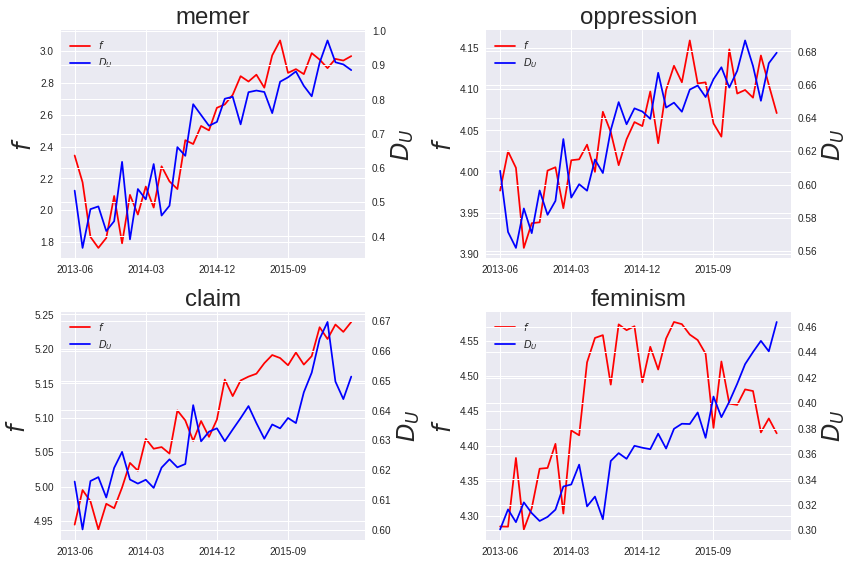

In [102]:
from __future__ import division
from data_processing.vis_helper import plot_separate_stats
from math import ceil
test_words = ['memer', 'oppression', 'claim', 'feminism']
cols = 2
rows = int(ceil(len(test_words) / cols))
size = 4
plt.figure(figsize=((size + 2) * cols, size * rows))
for i, w in enumerate(test_words):
    plt.subplot(rows, cols, i+1)
    plot_separate_stats(w, tf_smooth, D_U, '$f$', '$D_U$', xtick_ctr=4)
plt.tight_layout()
plt.show()

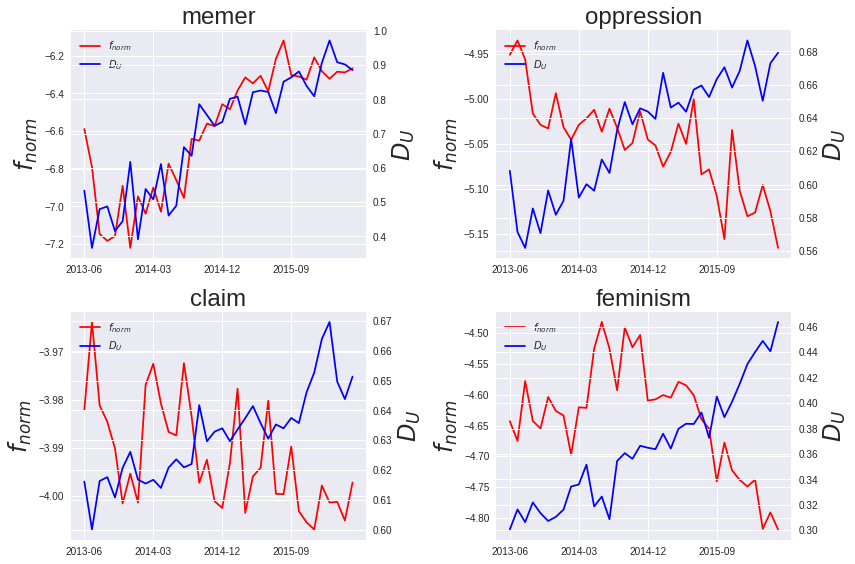

In [104]:
test_words = ['memer', 'oppression', 'claim', 'feminism']
cols = 2
rows = int(ceil(len(test_words) / cols))
size = 4
plt.figure(figsize=((size + 2) * cols, size * rows))
for i, w in enumerate(test_words):
    plt.subplot(rows, cols, i+1)
    plot_separate_stats(w, tf_norm_smooth, D_U, '$f_{norm}$', '$D_U$', xtick_ctr=4)
plt.tight_layout()
plt.show()

Words with a $f_{norm}$ decline also experience an increase in $D_{U}$, probably because the actual count of users $U$ remains static while the frequency decreases. So it's a dedicated subgroup of users who keep the decline words alive.

Same test but with $D_S$ and $D_T$.

In [108]:
X = range(D_S.shape[1])
D_S_correls = D_S.apply(lambda y: pd.Series(spearmanr(X, y), index=['correl', 'pvalue']), axis=1)
D_T_correls = D_T.apply(lambda y: pd.Series(spearmanr(X, y), index=['correl', 'pvalue']), axis=1)

In [110]:
print(D_S_correls.sort_values('correl', inplace=False, ascending=False).head(20))
print(D_T_correls.sort_values('correl', inplace=False, ascending=False).head(20))

              correl        pvalue
evods       0.961133  1.395768e-20
ubers       0.958044  5.001167e-20
vamo        0.955212  1.485059e-19
tumblrites  0.949035  1.273498e-18
clearos     0.948777  1.384611e-18
evilswarm   0.941055  1.419212e-17
zmax        0.940798  1.525280e-17
bfl         0.938739  2.684355e-17
ekowool     0.935393  6.459300e-17
polishes    0.933333  1.083593e-16
unpadded    0.926641  5.229497e-16
sjws        0.926641  5.229497e-16
stronk      0.926641  5.229497e-16
tankiness   0.925354  6.958170e-16
tvc         0.925097  7.362680e-16
airhole     0.924067  9.211547e-16
essie       0.922780  1.213518e-15
mani        0.922265  1.353171e-15
iclear      0.920978  1.770966e-15
patriarchy  0.920721  1.867859e-15
                  correl        pvalue
af              0.977864  1.107497e-24
rn              0.953925  2.380110e-19
patriarchy      0.942342  9.849111e-18
shitlord        0.934363  8.383686e-17
fokin           0.931274  1.788516e-16
exists          0.928443  3.475

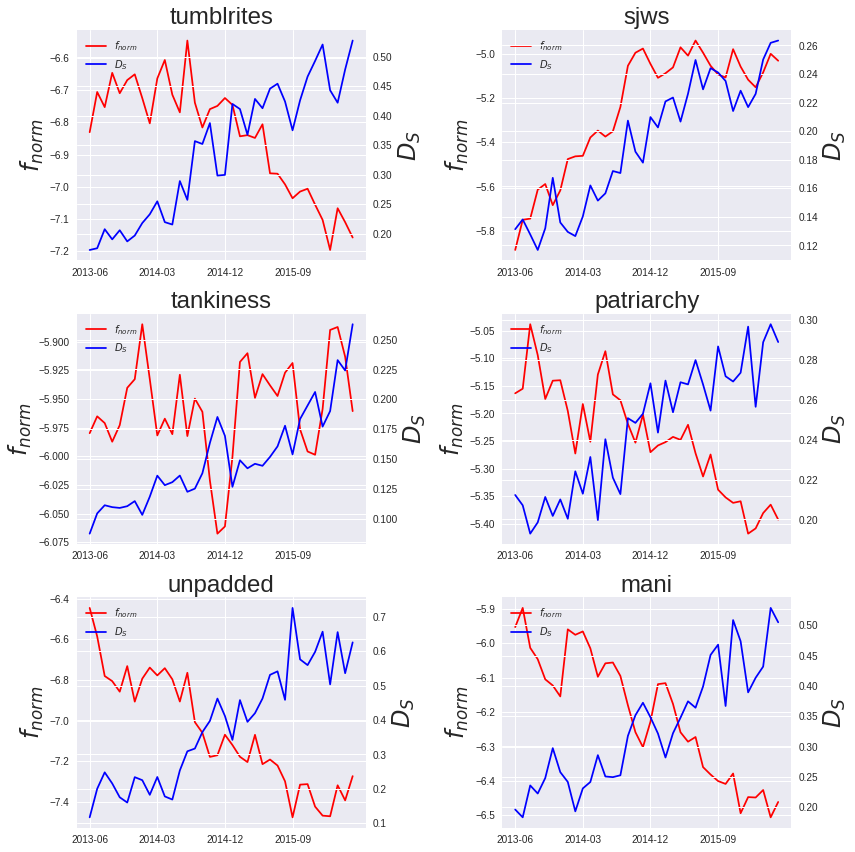

In [114]:
test_words = ['tumblrites', 'sjws', 'tankiness', 'patriarchy', 'unpadded', 'mani']
cols = 2
rows = int(ceil(len(test_words) / cols))
size = 4
D = D_S
D_name = '$D_S$'
plt.figure(figsize=((size + 2) * cols, size * rows))
for i, w in enumerate(test_words):
    plt.subplot(rows, cols, i+1)
    plot_separate_stats(w, tf_norm_smooth, D, '$f_{norm}$', D_name, xtick_ctr=4)
plt.tight_layout()
plt.show()

Words like `tumblrites` and `patriarchy` become restricted to certain subreddits, while `sjws` are accepted among a wider spread of subreddits than expected.

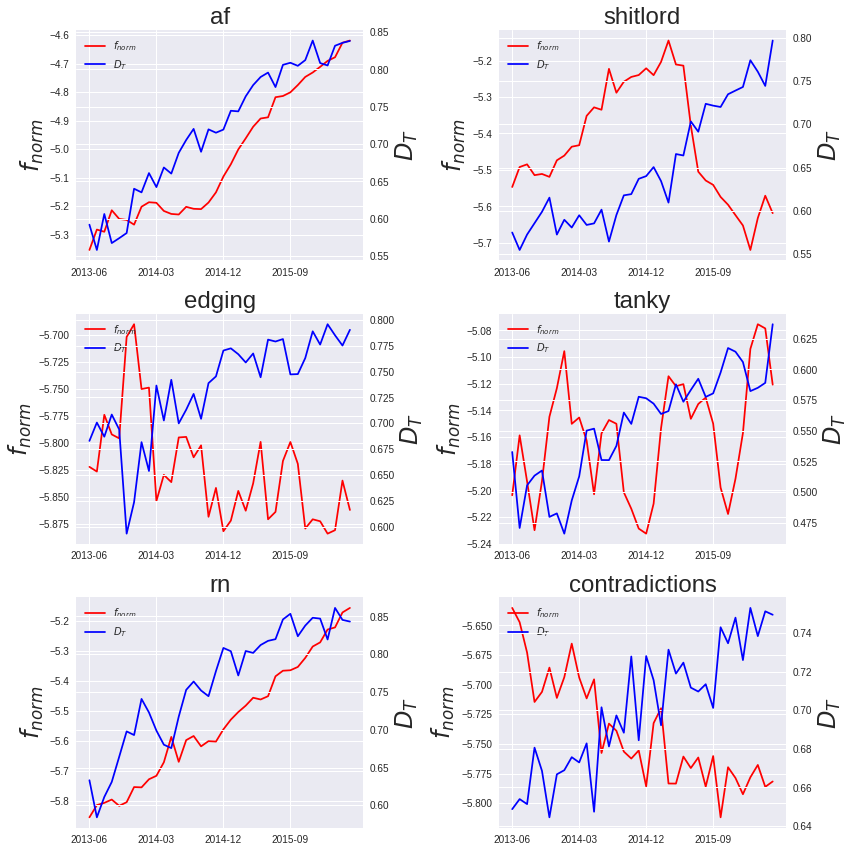

In [115]:
test_words = ['af', 'shitlord', 'edging', 'tanky', 'rn', 'contradictions']
cols = 2
rows = int(ceil(len(test_words) / cols))
size = 4
D = D_T
D_name = '$D_T$'
plt.figure(figsize=((size + 2) * cols, size * rows))
for i, w in enumerate(test_words):
    plt.subplot(rows, cols, i+1)
    plot_separate_stats(w, tf_norm_smooth, D, '$f_{norm}$', D_name, xtick_ctr=4)
plt.tight_layout()
plt.show()

$D_{T}$ is harder to interpret! Words like `shitlord` and `contradictions` get restricted to limited set of threads, while words like `af` and `rn` spread to a wider set of threads that outpaces $f_{norm}$.

## Correlation between frequency and dissemination

Let's take a closer look at words with positive correlations between $f_{norm}$ and $D$.

In [128]:
from stopwords import get_stopwords
stops = set(get_stopwords('en'))
vocab = reduce(lambda x,y: x&y, [s.index for s in [tf_norm_smooth, D_U, D_S, D_T]])
vocab = list(set(vocab) - stops)
print(len(vocab))

99998


In [129]:
tf_norm_smooth = tf_norm_smooth.loc[vocab]
D_U = D_U.loc[vocab]
D_S = D_S.loc[vocab]
D_T = D_T.loc[vocab]

In [130]:
D_list = [D_U, D_S, D_T]
D_names = ['D_U', 'D_S', 'D_T']
f_D_correls = []
for D, D_name in izip(D_list, D_names):
    f_correls = pd.np.vstack([pearsonr(tf_norm_smooth.values[i, :], D.values[i, :])[0] for i in range(len(vocab))])
    f_correls = pd.DataFrame(f_correls, index=vocab, columns=['%s_correl'%(D_name)])
    f_D_correls.append(f_correls)
f_D_correls = pd.concat(f_D_correls, axis=1)

In [134]:
X = range(tf_norm_smooth.shape[1])
tf_norm_correls = pd.np.vstack([pearsonr(X, tf_norm_smooth.values[i, :])[0] for i in range(len(vocab))])
tf_norm_correls = pd.DataFrame(tf_norm_correls, index=vocab, columns=['correl'])

In [135]:
f_D_correls['f_correl'] = tf_norm_correls

In [138]:
for D_name in D_names:
    print(D_name)
    print(f_D_correls.sort_values('%s_correl'%(D_name), inplace=False, ascending=False).head(20))

D_U
            D_U_correl  D_S_correl  D_T_correl  f_correl
af            0.908486    0.799111    0.913531  0.961102
sir           0.905670    0.212255    0.561431 -0.977144
song          0.878504    0.043104   -0.145575 -0.905266
delicious     0.878090    0.422569   -0.704519 -0.973893
bruh          0.866063    0.812154    0.640376  0.934452
loved         0.859535    0.316679   -0.119996 -0.845284
school        0.847442    0.526803   -0.519131 -0.901391
memer         0.837481    0.573099    0.718072  0.870520
girls         0.834727   -0.005816   -0.682624 -0.977615
ever          0.816165    0.570882    0.290898 -0.983565
parents       0.811807    0.218844   -0.652485 -0.939787
picture       0.811635    0.319730   -0.107826 -0.990278
til           0.809334    0.470779    0.091568 -0.944313
struggle      0.798173    0.190022    0.805600  0.941306
sister        0.797019   -0.273861   -0.391003 -0.850773
membership    0.786128    0.749341    0.898704  0.285788
mother        0.780448   -0

Top correlations:

- $D_{U}$ discourse words like `af`, `sir`, `ever`
- $D_{S}$ spam words like `paperback`, `ibooks`, `starring`
- $D_{T}$ topical words like `domain`, `italian`, `ebay`

In terms of $f_{correl}$:

- $D_{U}$ have either strong growth or strong decline
- $D_{S}$ have weak growth
- $D_{T}$ have either strong/weak growth or strong/weak decline

suggesting that discourse and topical words tend to fall in or out of fashion (i.e. frequency success correlates with social success). 

What about words that have a negative correlation between $D$ and $f$? I.e. words that survive among a small subset of users/subreddits/threads?

In [139]:
for D_name in D_names:
    print(D_name)
    print(f_D_correls.sort_values('%s_correl'%(D_name), inplace=False, ascending=True).head(20))

D_U
             D_U_correl  D_S_correl  D_T_correl  f_correl
rebates       -0.995674   -0.986741   -0.991527  0.874138
trump         -0.994690   -0.963302   -0.967646  0.835627
raving        -0.992799   -0.937353   -0.992338  0.226520
das           -0.992607   -0.953847   -0.993965  0.887147
unanswered    -0.990372   -0.982439   -0.990892 -0.409648
drained       -0.990198   -0.951628   -0.986800  0.058851
kan           -0.989604   -0.978251   -0.975693  0.923181
poems         -0.989563    0.899544   -0.949096  0.438917
dds           -0.989376   -0.932222   -0.977970  0.899802
patron        -0.988862   -0.977715   -0.992434  0.712902
supporters    -0.988861   -0.958384   -0.985858  0.773265
touches       -0.988628   -0.902068   -0.983418 -0.054205
pledged       -0.988401   -0.956783   -0.984198  0.712387
wrote         -0.987869   -0.707375   -0.988278 -0.695059
supporter     -0.987846   -0.955948   -0.989966  0.760556
candidate     -0.987659   -0.963224   -0.981041  0.828388
categorize

Top correlations:
- $D_{U}$  topical words like `candidate`, `pledges`
- $D_{S}$ topical words like `wir`, `kann` (i.e. Germans invading subreddits) 
- $D_{T}$ topical words like `supporter`, `progressive` and discourse words like `replying`, `wrote`

In terms of $f_{correl}$:

- $D_{U}$ have strong or weak growth or weak decline
- $D_{S}$ have strong growth
- $D_{T}$ have strong or weak growth or weak decline

This suggests that topical words tend to become under-disseminated (higher $f$, lower $D$) and discourse words tend to become over-disseminated (lower $f$, higher $D$). 

## Plot direction of change
Plot frequency vs. dissemination and annotate with example words: plot each word's initial position as well as final position, marking the change with an arrow. Easier to read than the previous chart!

user dissemination
subreddit dissemination
thread dissemination


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:28: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


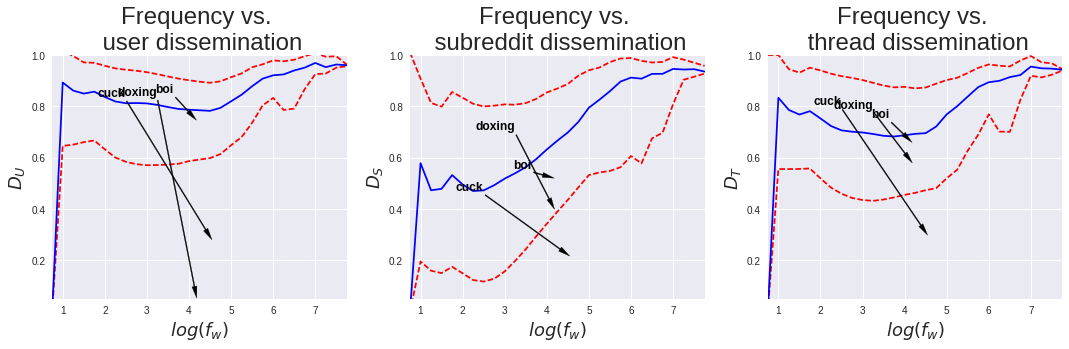

In [183]:
y_stat_vars = ['D_U', 'D_S', 'D_T']
x_stat = combined_df['f']
x_bin_width = 0.25
lower_percentile = 10
upper_percentile = 90
stat_vals = {}
for y_stat_var in y_stat_vars:
    y_stat = combined_df[y_stat_var]
    x_vals, lower_percentile_vals, median_vals, upper_percentile_vals = get_binned_stats(x_stat, y_stat, 
                                                                                         x_bin_width=x_bin_width, 
                                                                                         lower_percentile=lower_percentile,
                                                                                         upper_percentile=upper_percentile)
    stat_vals[y_stat_var] = (x_vals, lower_percentile_vals, median_vals, upper_percentile_vals)
y_stat_vars = ['D_U', 'D_S', 'D_T']
y_stat_names = ['user dissemination', 'subreddit dissemination', 'thread dissemination']
annotate_words = ['boi', 'doxing', 'cuck']
# avoid: idgaf, flaired, af, clunky, clunkiness, fuckboy
initial_date = '2014-06'
final_date = '2016-05'
size = 5
rows = 1
cols = len(y_stat_names)
y_lower = 0.05
y_upper = 1.0
txt_offset_x = 0.
txt_offset_y = 0.
plt.figure(figsize=(cols*size, rows*size))
for i, (y_var, y_name) in enumerate(zip(y_stat_vars, y_stat_names)):
    print(y_name)
    plt.subplot(rows, cols, i+1)
    # plot percentiles first
    x_vals, lower_percentile_vals, median_vals, upper_percentile_vals = stat_vals[y_var]
    plt.plot(x_vals, lower_percentile_vals, 'r--')
    plt.plot(x_vals, upper_percentile_vals, 'r--')
    # plot medians differently
    plt.plot(x_vals, median_vals, 'b-')
    plt.title('Frequency vs. \n %s'%(y_name), fontsize=24)
    plt.xlabel('$log(f_w)$', fontsize=18)
    plt.ylabel('$%s$'%(y_var), fontsize=18)
    x_lower = min(x_vals)
    x_upper = max(x_vals)
    plt.xlim(x_lower, x_upper)
    plt.ylim(y_lower, y_upper)
    for w in annotate_words:
        # plot word at initial point
        combined_initial = combined_df[(combined_df['word'] == w) & (combined_df['date'] == initial_date)]
        xy_initial = (combined_initial['f'], combined_initial[y_var])
#         plt.annotate(w, xy=xy_initial, xycoords='data', xytext=xy_initial, textcoords='data', weight='bold', color='k')
        # plot arrow toward final point
        combined_final = combined_df[(combined_df['word'] == w) & (combined_df['date'] == final_date)]
        xy_final = (combined_final['f'], combined_final[y_var])
        plt.annotate(w, xy_final, xycoords='data', xytext=xy_initial, textcoords='data', weight='bold', color='k',
                     arrowprops=dict(facecolor='black', width=1., headwidth=5.))
plt.tight_layout()
plt.show()

## Visualize density
Plot the density of frequency vs. dissemination along with annotations, maybe that will be an easier sell than this median/percentile stuff.

In [7]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
if('..' not in sys.path):
    sys.path.append('..')
from data_processing.data_handler import smooth_stats, get_default_vocab, melt_frames

In [4]:
tf = pd.read_csv('../../data/frequency/2013_2016_tf_norm.tsv', sep='\t', index_col=0)
vocab = get_default_vocab()
tf = pd.np.log10(smooth_stats(tf.loc[vocab]))

In [5]:
D_U = pd.read_csv('../../data/frequency/2013_2016_user_diffusion.tsv', sep='\t', index_col=0)
D_S = pd.read_csv('../../data/frequency/2013_2016_subreddit_diffusion.tsv', sep='\t', index_col=0)
D_T = pd.read_csv('../../data/frequency/2013_2016_thread_diffusion.tsv', sep='\t', index_col=0)

In [8]:
all_stats = [tf, D_U, D_S, D_T]
stat_names = ['f', 'D_U', 'D_S', 'D_T']
combined_df = melt_frames(all_stats, stat_names)
print(combined_df.shape)

(3599964, 6)


In [14]:
mean_df = combined_df.groupby('word').apply(pd.np.mean, axis=0)
print(mean_df.head())

                f       D_U       D_S       D_T
word                                           
aa      -4.703634  0.566965  0.407362  0.478021
aaa     -5.026397  0.697779  0.459285  0.573569
aaaa    -6.948163  0.902215  0.847351  0.931935
aaaah   -6.222556  0.920337  0.935966  0.975089
aaaahhh -6.685749  0.954938  0.873562  0.971811


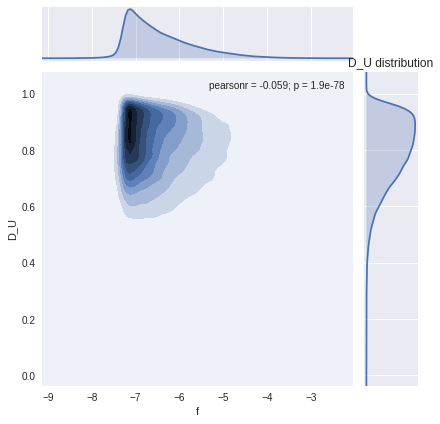

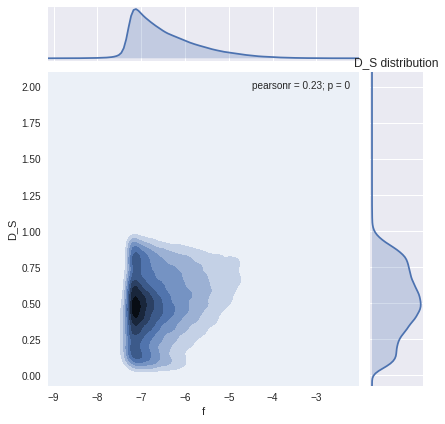

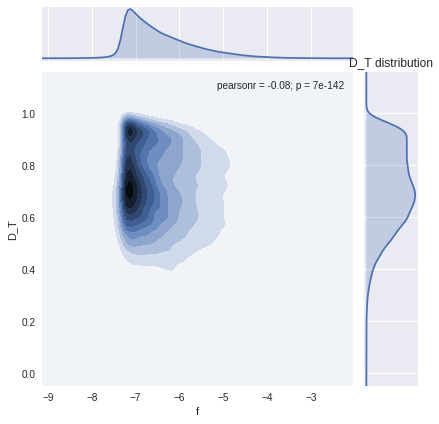

In [15]:
D_names = ['D_U', 'D_S', 'D_T']
M = len(D_names)
size = 4
x_stat = 'f'
S = 10000
# sample_idx = pd.np.random.choice(combined_df.index, S, replace=False)
# sample_df = combined_df.iloc[sample_idx, :]
for D_name in D_names:
    plt.figure(figsize=(size, size))
    sns.jointplot(x=x_stat, y=D_name, data=mean_df, kind='kde')
    plt.title('%s distribution'%(D_name))
    plt.show()

Restrict the x and y range to cut off the distribution tails.

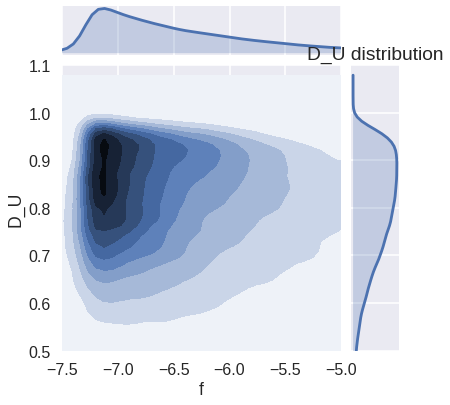

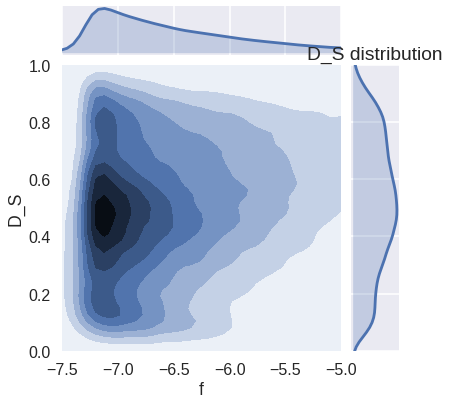

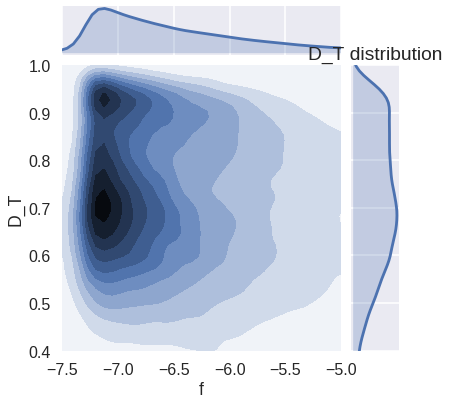

In [30]:
# fontsize = 24
# matplotlib.rcParams.update({'font.size' : fontsize})
sns.set_context("poster", font_scale=1.0)
xlim = (-7.5, -5)
ylims = [(0.5, 1.1), (0., 1.), (0.4, 1.0)]
# S = 10000
# sample_idx = pd.np.random.choice(mean_df.index, S, replace=False)
# sample_mean_df = mean_df.iloc[sample_idx, :]
for i, D_name in enumerate(D_names):
    plt.figure(figsize=(size, size))
    ylim = ylims[i]
    sns.jointplot(x=x_stat, y=D_name, data=mean_df, kind='kde', xlim=xlim, ylim=ylim, stat_func=None)
    plt.title('%s distribution'%(D_name))
    plt.show()

Let's figure out some good annotations!

In [162]:
growth_words = pd.read_csv('../../data/frequency/word_lists/2013_2016_growth_words_clean.csv', index_col=None)['word'].tolist()
print(len(growth_words))

1458


In [163]:
print(mean_df.loc[growth_words].quantile([0.25,0.75]))

             f       D_U       D_S       D_T
0.25 -6.901650  0.759901  0.408291  0.715062
0.75 -5.960836  0.902426  0.725844  0.902816


### Dissemination by frequency band

In [164]:
quantiles = [0.05, 0.1, 0.25, 0.5, 0.75, 1.00]
S = 100
for D_name in D_names:
    print(D_name)
    # split into quartiles
    mean_df_relevant = mean_df.loc[growth_words, D_name].sort_values(ascending=False, inplace=False)
    quartiles = mean_df_relevant.quantile(quantiles)
    for q in quartiles:
        print(q)
        print(mean_df_relevant[mean_df_relevant < q].sort_values(ascending=False, inplace=False).head(S))

D_U
0.614163023679
word
benzo          0.613043
shipping       0.609263
theyre         0.608425
megathread     0.607878
cus            0.607445
timezone       0.607156
zowie          0.605815
hardpoints     0.605803
doesnt         0.605529
untagged       0.605398
temping        0.605068
flaired        0.603540
mmh            0.603475
gynocentric    0.602304
beeing         0.599542
fanservice     0.598793
litt           0.597536
cooldown       0.597411
bc             0.597134
loot           0.596724
propably       0.594245
opioids        0.594209
synth          0.592831
coz            0.592545
opioid         0.588998
exp            0.587526
alg            0.581457
agg            0.580988
xp             0.580902
smalling       0.575733
                 ...   
modmail        0.549457
cig            0.547769
kexts          0.544620
dm             0.541242
aggro          0.537681
kext           0.535466
yeh            0.534526
sjw            0.534141
func           0.529869
chummer        0

In [165]:
# full list
# ['tdee', 'untagged', 'megathreads', 'cuck', 'decarb', 'zowie', 'bc', 'jobber', 'bootcamps',
# 'tbh', 'ima', 'otp', 'fav', 'runtimes', 'huh',
# 'autists', 'influencers', 'clunky', 'neato', 'abusable', 'laggy',
# 'pilled', 'culty', 'redownloaded', 'tankiest', 'overhyped'
# ]
# get list for each dissemination type
annotate_word_lists = [
    ['af', 'megathreads', 'bc', 'jobber',
     'tbh', 'otp', 'fav', 'huh',
     'autists', 'clunky', 'neato', 
     'pilled', 'fanservice'
    ],
    ['af', 'megathreads', 'bc', 'jobber',
     'tbh', 'otp', 'fav', 'huh',
     'autists', 'clunky', 'neato', 
     'pilled', 'fanservice'
    ],
    ['af', 'megathreads', 'bc', 'jobber',
     'tbh', 'otp', 'fav', 'huh',
     'autists', 'clunky', 'neato', 
     'pilled', 'fanservice'
    ],
]
# annotate_word_lists = [['tdee', 'untagged', 'megathreads', 'cuck', 'decarb', 'zowie', 'bc', 'jobber', 'bootcamps',
#                         'tbh', 'ima', 'otp', 'pmed', 'werk', 'salty', 'fav', 'runtimes', 'huh',
#                         'autists', 'influencers', 'clunky', 'neato', 'abusable', 'laggy',
#                         'pilled', 'culty', 'redownloaded', 'misremembered', 'tankiest', 'overhyped'], # D_U
#                        ['saltiest', 'cringefest', 'algs', 'feats', 'sjws', 'atk', 'trans'], # D_S
#                        ['cringefest', 'dooope', 'wth', 'botting', 'vape'] # D_T
#                       ]

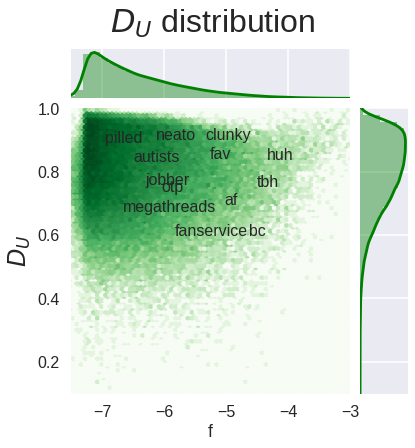

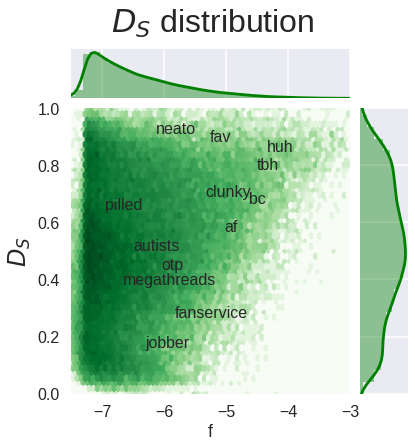

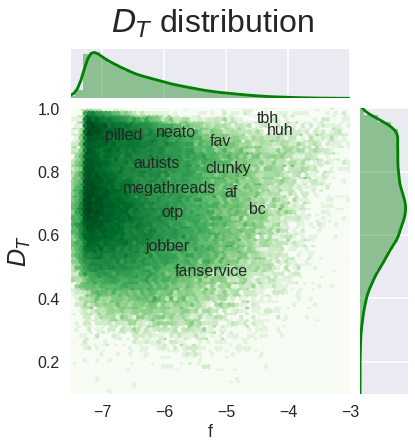

In [169]:
sns.set_context("poster", font_scale=1.0)
xlim = (-7.5, -3)
ylims = [(0.1, 1.0), (0., 1.0), (0.1, 1.0)]
annotate_font = 16
size = 10
cmap = plt.get_cmap('Greens')
bin_color = 'g'
for i, D_name in enumerate(D_names):
    D_name_tex = '$%s$'%(D_name)
    ylim = ylims[i]
    annotate_words = annotate_word_lists[i]
    g = sns.JointGrid(x=x_stat, y=D_name, data=mean_df, xlim=xlim, ylim=ylim)
    g.plot_marginals(sns.distplot, color=bin_color)
    g.plot_joint(plt.hexbin, cmap=cmap, bins='log')
#     g = g.plot(sns.kdeplot, sns.distplot)
    # annotations don't work with built-in jointplot hex ;_;
#     p = sns.jointplot(x=x_stat, y=D_name, data=mean_df, kind='hex', 
#                       xlim=xlim, ylim=ylim, stat_func=None, size=size,)
    # add annotations
    for w in annotate_words:
        x, y = (mean_df.loc[w, 'f'], mean_df.loc[w, D_name])
#         print('(x,y)=(%.3f,%.3f)'%(x,y))
# #         txt = p.fig.text(x, y, w, fontsize=annotate_font)
        plt.annotate(w, xy=(x,y), size=annotate_font)#, xytext=(0,0), textcoords='offset points')
        # JointGrid.annotate() requires function
#         g.annotate(w, xy=(x,y))
    plt.ylabel(D_name_tex, fontsize=24)
    plt.suptitle('%s distribution'%(D_name_tex), fontsize=32, y=1.05)
    plt.show()

## Log dissemination
If we're using the log ratio for context diversity, then we should also use the log ratio for dissemination, right?

In [66]:
def log_func(s):
    s_min = s[s > 0].min().min()
    s_log = s.applymap(lambda x: pd.np.log10(x + s_min))
    return s_log
D_U_log = log_func(D_U.drop('word', axis=1).fillna(0, inplace=False))
D_S_log = log_func(D_S.drop('word', axis=1).fillna(0, inplace=False))
D_T_log = log_func(D_T.drop('word', axis=1).fillna(0, inplace=False))

In [39]:
tf = pd.read_csv('../../data/frequency/2013_2016_tf_norm_log.tsv', sep='\t', index_col=0)

In [67]:
import sys
if('..' not in sys.path):
    sys.path.append('..')
from data_processing.data_handler import melt_frames
all_stats = [tf, D_U_log, D_S_log, D_T_log]
stat_names = ['f', 'D_U', 'D_S', 'D_T']
combined_df = melt_frames(all_stats, stat_names)
print(combined_df.shape)
mean_df = combined_df.groupby('word').apply(pd.np.mean, axis=0)
print(mean_df.head())

(3599964, 6)
                f       D_U       D_S       D_T
word                                           
aa      -4.703634 -0.246727 -0.391231 -0.321001
aaa     -5.026397 -0.156544 -0.338780 -0.241731
aaaa    -6.948163 -0.045164 -0.073554 -0.031220
aaaah   -6.222556 -0.036168 -0.029111 -0.010971
aaaahhh -6.685749 -0.020166 -0.059568 -0.012438


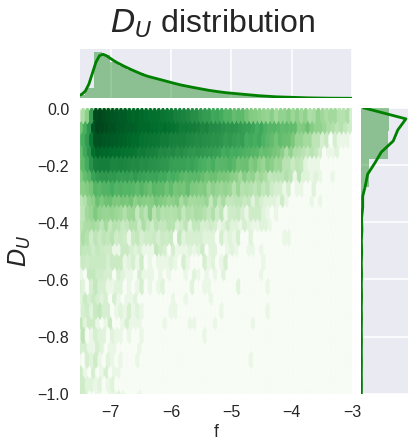

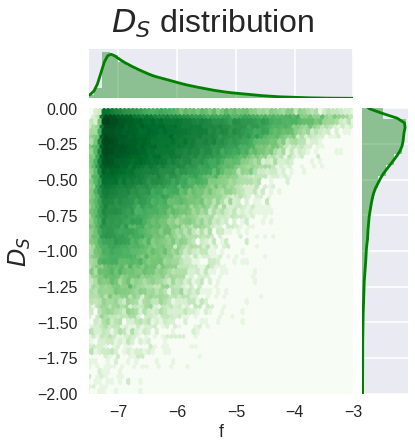

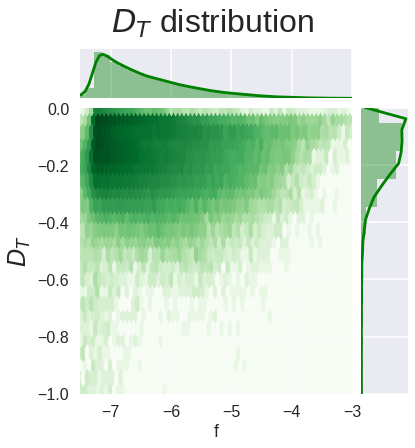

In [69]:
import seaborn as sns
sns.set_context("poster", font_scale=1.0)
xlim = (-7.5, -3)
ylims = [(-1., 0.), (-2., 0.), (-1., 0.)]
annotate_font = 16
size = 10
cmap = plt.get_cmap('Greens')
bin_color = 'g'
D_names = ['D_U', 'D_S', 'D_T']
x_stat = 'f'
for i, D_name in enumerate(D_names):
    D_name_tex = '$%s$'%(D_name)
    ylim = ylims[i]
    g = sns.JointGrid(x=x_stat, y=D_name, data=mean_df, xlim=xlim, ylim=ylim, )
    g.plot_marginals(sns.distplot, color=bin_color)
    g.plot_joint(plt.hexbin, cmap=cmap, bins='log')
    plt.ylabel(D_name_tex, fontsize=24)
    plt.suptitle('%s distribution'%(D_name_tex), fontsize=32, y=1.05)
    plt.show()

Compared with the originals, these distributions are more peaky (less kurtosis).

Check for normality! Need a test that can handle large sample size (so not Shapiro which requires $N<5000$).

In [71]:
from scipy.stats import normaltest
for D_name in D_names:
    D_stat = pd.np.array(combined_df.loc[:, D_name]).copy()
#     print(D_stat.shape)
# mask error in normal test
#     stat, pval = normaltest(D_stat)
    stat, pval = normaltest(D_stat)
    print('%s: stat=%.3f p=%.3E'%(D_name, stat, pval))

D_U: stat=6190476.074 p=0.000E+00
D_S: stat=3203871.129 p=0.000E+00
D_T: stat=5985741.737 p=0.000E+00


So we can conclude that the distribution of combined data is not normal. Not what I was expecting!

What about the original non-logged data?

In [73]:
from itertools import izip
D_stats = [D_U, D_S, D_T]
for D_name, D_stat in izip(D_names, D_stats):
    stat, pval = normaltest(D_stat.drop('word', axis=1).fillna(0, inplace=False).values.flatten())
    print('%s: stat=%.3f p=%.3E'%(D_name, stat, pval))

D_U: stat=1141392.311 p=0.000E+00
D_S: stat=366.035 p=3.285E-80
D_T: stat=300479.383 p=0.000E+00


So neither the original dissemination nor the logged dissemination follows a normal distribution. Not great!

### 